In [2]:
from keras import Input, Sequential
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Embedding, LSTM, Dropout, Flatten
from keras.utils.vis_utils import plot_model
import visualkeras

input = Input(shape=(100,), dtype='int32', name='input')
x = Embedding(
    output_dim=512, input_dim=10000, input_length=100)(input)
x = LSTM(32)(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid', name='output')(x)
model = Model(inputs=[input], outputs=[output])
dot_img_file = 'model_1.png'
plot_model(model, to_file=dot_img_file, show_shapes=True)
model.summary()
#visualkeras.layered_view(model) 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 512)          5120000   
                                                                 
 lstm (LSTM)                 (None, 32)                69760     
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 output (Dense)              (None, 1)                 65    

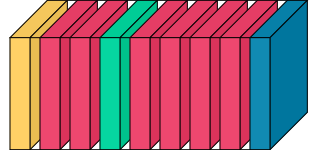

In [24]:
from keras.layers import Concatenate

input_layer = Input(shape=(28,28,1), name='input_layer')
conv2d_0 = Conv2D(32, kernel_size=(1, 1), activation="relu", padding="same")(input_layer)
conv2d_1 = Conv2D(32, kernel_size=(1, 1), activation="relu", padding="same")(input_layer)
conv2d_2 = Conv2D(32, kernel_size=(1, 1), activation="relu", padding="same")(input_layer)
maxpool = MaxPooling2D(pool_size=(3, 3), strides=(1,1), padding="same")(input_layer)
conv2d_2layer_0 = Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(conv2d_1)
conv2d_2layer_1 = Conv2D(32, kernel_size=(5, 5), activation="relu", padding="same")(conv2d_2)
conv2d_2layer_2 = Conv2D(32, kernel_size=(1, 1), activation="relu", padding="same")(maxpool)
concatenated = Concatenate()([conv2d_0, conv2d_2layer_0, conv2d_2layer_1, conv2d_2layer_2])
model = Model(input_layer, concatenated)

dot_img_file = 'model_2.png'
plot_model(model, to_file=dot_img_file, show_shapes=True)
#model.summary()
visualkeras.layered_view(model) 



In [35]:
from keras.datasets import imdb
from keras.utils import pad_sequences

max_len =500
batch_size =128
NUM_WORDS =10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=NUM_WORDS)


In [36]:
print(train_data.shape)
train_data

(25000,)


array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [37]:
train_data = pad_sequences(train_data, maxlen=max_len)
test_data  = pad_sequences(test_data, maxlen=max_len)
print(train_data.shape)
train_data

(25000, 500)


array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]])

In [44]:
from keras import Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout

model = Sequential([
    Embedding(input_dim=NUM_WORDS, output_dim=128, input_length=(train_data.shape[1])),
    LSTM(units=60, activation="tanh"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 lstm_2 (LSTM)               (None, 60)                45360     
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 1,325,421
Trainable params: 1,325,421
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(train_data, train_labels, epochs=5, batch_size=batch_size, validation_data=(test_data, test_labels))

Epoch 1/5
196/196 [==============================] - 158s 795ms/step - loss: 0.4076 - acc: 0.8093 - val_loss: 0.3150 - val_acc: 0.8684
Epoch 2/5
196/196 [==============================] - 146s 744ms/step - loss: 0.2570 - acc: 0.9021 - val_loss: 0.3171 - val_acc: 0.8703
Epoch 3/5
196/196 [==============================] - 140s 715ms/step - loss: 0.1829 - acc: 0.9334 - val_loss: 0.3114 - val_acc: 0.8741
Epoch 4/5
196/196 [==============================] - 140s 714ms/step - loss: 0.1497 - acc: 0.9448 - val_loss: 0.4117 - val_acc: 0.8674
Epoch 5/5
196/196 [==============================] - 138s 707ms/step - loss: 0.1023 - acc: 0.9655 - val_loss: 0.4032 - val_acc: 0.8690
